📄 Resultados salvos em: C:/Users/pedmi/PycharmProjects/PythonProject/.venv/TCC/FILE/ALGORITMOS/resultado_final_oscar_2025.csv


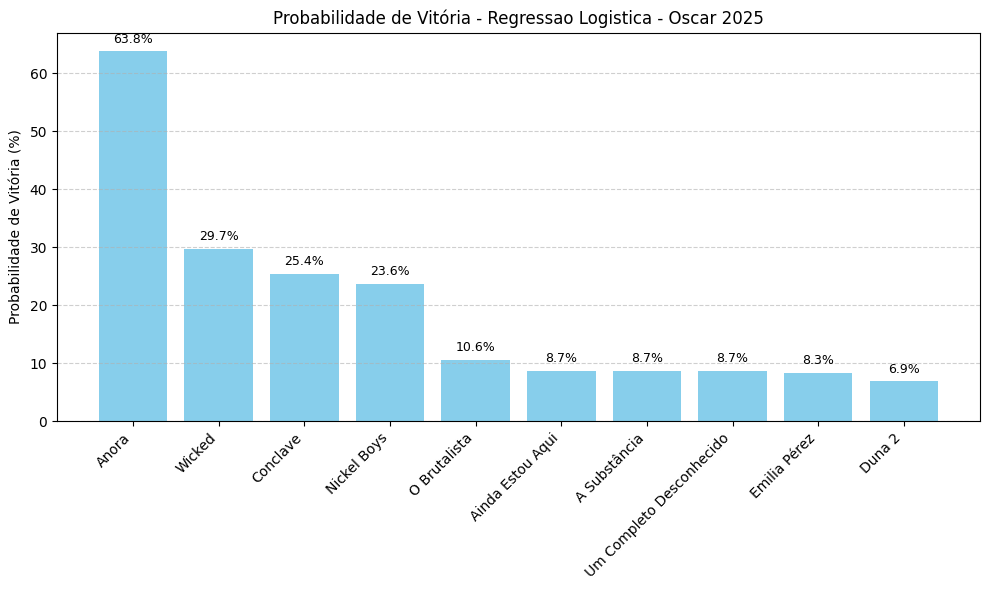

✅ Gráfico salvo em: C:/Users/pedmi/PycharmProjects/PythonProject/.venv/TCC/FILE/GRAFICOS\grafico_regressao_logistica_oscar_2025.png


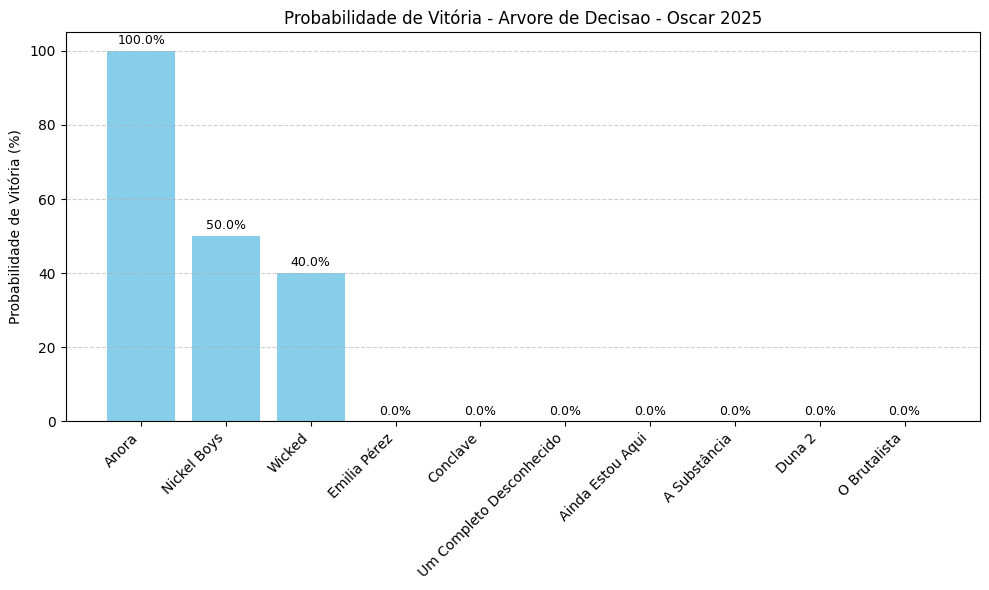

✅ Gráfico salvo em: C:/Users/pedmi/PycharmProjects/PythonProject/.venv/TCC/FILE/GRAFICOS\grafico_arvore_de_decisao_oscar_2025.png


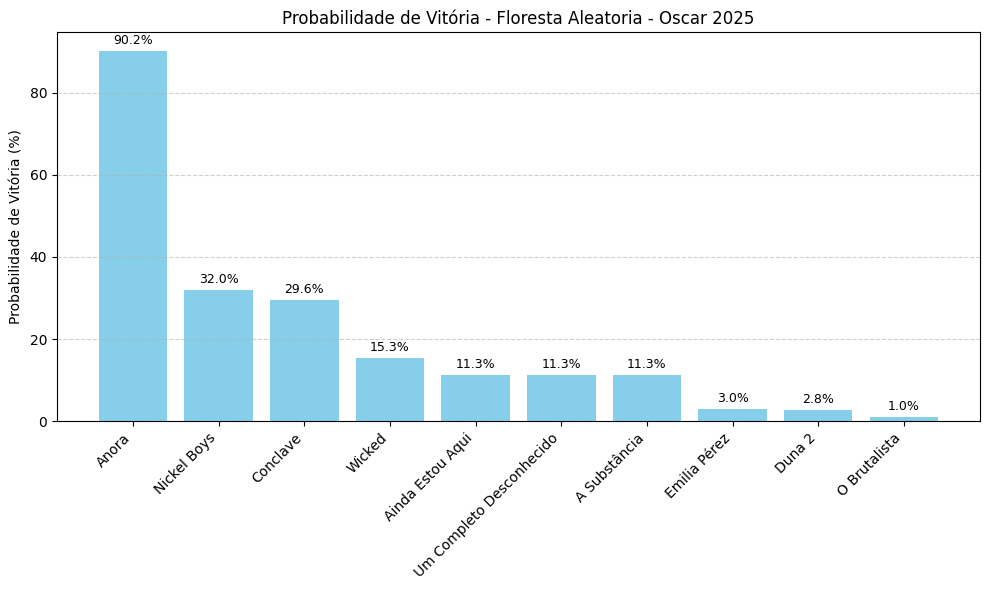

✅ Gráfico salvo em: C:/Users/pedmi/PycharmProjects/PythonProject/.venv/TCC/FILE/GRAFICOS\grafico_floresta_aleatoria_oscar_2025.png


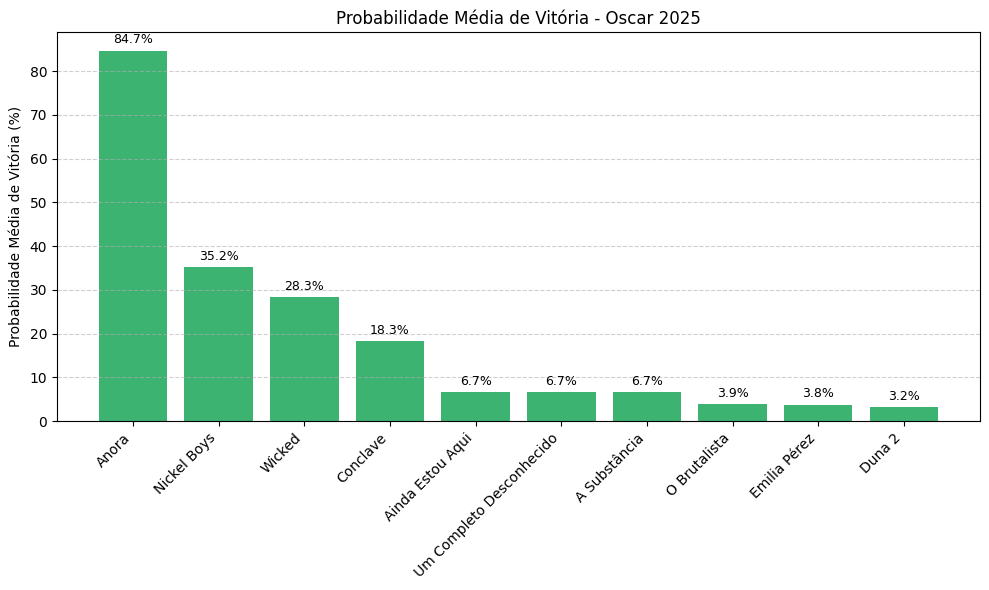

✅ Gráfico salvo em: C:/Users/pedmi/PycharmProjects/PythonProject/.venv/TCC/FILE/GRAFICOS\grafico_probabilidade_media_oscar_2025.png


In [7]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os

# Carregar modelos já treinados
modelos = {
    "Regressao Logistica": joblib.load("FILE/ALGORITMOS/REGRESSAO_LOGISTICA/modelo_regressao_logistica.pkl"),
    "Arvore de Decisao": joblib.load("FILE/ALGORITMOS/ARVORE_DECISAO/modelo_arvore_decisao.pkl"),
    "Floresta Aleatoria": joblib.load("FILE/ALGORITMOS/FLORESTA_ALEATORIA/modelo_floresta_aleatoria.pkl")
}

premiacoes = ['BAFTA', 'DGA', 'GlobodeOuro', 'Gotham', 'NationalBoard', 'PGA', 'SAG', 'Satellite']

# Carregar CSV com filmes
csv_filmes = "../../FILE/filmes_oscar_2025.csv"
df_filmes = pd.read_csv(csv_filmes, sep=';')

resultados_finais = []

# Calcular probabilidade para cada filme e algoritmo
for index, row in df_filmes.iterrows():
    filme = row["Filme"]
    dados_filme = row[premiacoes].tolist()
    df_input = pd.DataFrame([dados_filme], columns=premiacoes)

    resultado_filme = {"Filme": filme}

    for nome_modelo, modelo in modelos.items():
        proba = modelo.predict_proba(df_input)[0][1] * 100
        resultado_filme[f"{nome_modelo}_Chance_%"] = round(proba, 2)

    resultados_finais.append(resultado_filme)

# Criar DataFrame com resultados completos
df_resultados = pd.DataFrame(resultados_finais)

# Adicionar flags para vencedor de cada algoritmo
for nome_modelo in modelos.keys():
    coluna_vencedor = f"{nome_modelo}_Vencedor"
    coluna_proba = f"{nome_modelo}_Chance_%"
    maior_proba = df_resultados[coluna_proba].max()

    df_resultados[coluna_vencedor] = df_resultados[coluna_proba].apply(
        lambda x: 'Sim' if x == maior_proba else 'Nao'
    )

# Salvar resultados
log_path = "TCC/FILE/ALGORITMOS/resultado_final_oscar_2025.csv"
df_resultados.to_csv(log_path, sep=';', index=False)

print(f"Resultados salvos em: {log_path}")

# Diretório para gráficos
grafico_dir = "TCC/FILE/GRAFICOS"
os.makedirs(grafico_dir, exist_ok=True)

# Gráfico para cada algoritmo
for nome_modelo in modelos.keys():
    plt.figure(figsize=(10, 6))
    df_ordenado = df_resultados.sort_values(by=f"{nome_modelo}_Chance_%", ascending=False)
    bars = plt.bar(df_ordenado["Filme"], df_ordenado[f"{nome_modelo}_Chance_%"], color='skyblue')
    plt.ylabel('Probabilidade de Vitória (%)')
    plt.title(f'Probabilidade de Vitória - {nome_modelo} - Oscar 2025')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Adicionar porcentagens sobre as barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    caminho_grafico_modelo = os.path.join(grafico_dir, f"grafico_{nome_modelo.replace(' ', '_').lower()}_oscar_2025.png")
    plt.savefig(caminho_grafico_modelo, dpi=300)
    plt.show()

    print(f"Gráfico salvo em: {caminho_grafico_modelo}")

# Gráfico da média geral
df_resultados['Media'] = df_resultados[[f"{nome}_Chance_%" for nome in modelos]].mean(axis=1)
df_resultados = df_resultados.sort_values(by='Media', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_resultados["Filme"], df_resultados["Media"], color='mediumseagreen')
plt.ylabel('Probabilidade Média de Vitória (%)')
plt.title('Probabilidade Média de Vitória - Oscar 2025')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar porcentagens sobre as barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
caminho_completo = os.path.join(grafico_dir, "grafico_probabilidade_media_oscar_2025.png")
plt.savefig(caminho_completo, dpi=300)
plt.show()

print(f" Gráfico salvo em: {caminho_completo}")
